In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
import math

# Self-created Functions: 
import runLDA as rlda   # .py code with function to run LDA and generate plots

%matplotlib inline
pd.options.display.max_columns=100

## This Notebook: Runs LDA
1. On BOW data
2. TF-IDF data

### 1a. Load Data and Create BOW
(code from BMF file)

In [20]:
data = pd.read_json('train.json')
# get the list of ingredients
ingredientList = sorted(list(set([ingredient for i in range(data.shape[0]) for ingredient in data.loc[i,'ingredients']])))
# the mapping between ingredient and its index
ingredient2index = dict(zip(ingredientList, range(len(ingredientList))))
# create a binary matrix indicating whether or not an ingredient is in a recipe
binaryIngredientsMat = np.zeros((data.shape[0], len(ingredientList)))
for iRecipe in range(data.shape[0]):
    binaryIngredientsMat[iRecipe, [ingredient2index[ingredient] for ingredient in data.loc[iRecipe, 'ingredients']]] = 1
dataBinaryIngredients = pd.DataFrame(binaryIngredientsMat, columns=ingredientList)
dataBinaryIngredients.head()

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,1% low-fat milk,"2 1/2 to 3 lb. chicken, cut into serving pieces",2% low fat cheddar chees,2% low-fat cottage cheese,2% lowfat greek yogurt,2% milk shredded mozzarella cheese,2% reduced-fat milk,25% less sodium chicken broth,33% less sodium cooked deli ham,33% less sodium cooked ham,33% less sodium ham,33% less sodium smoked fully cooked ham,40% less sodium taco seasoning,40% less sodium taco seasoning mix,7 Up,"8 ounc ziti pasta, cook and drain",95% lean ground beef,A Taste of Thai Rice Noodles,Accent Seasoning,Adobo All Purpose Seasoning,Alaskan king crab legs,Alexia Waffle Fries,Alfredo sauce,Amarena cherries,Amaretti Cookies,American cheese,Anaheim chile,Angostura bitters,Argo Corn Starch,Asian chili sauce,Asian sweet chili sauce,Azteca Flour Tortillas,BACARDIÂ® Mixers Margarita Mix,BACARDIÂ® Superior,BREAKSTONE'S Sour Cream,Baileys Irish Cream Liqueur,Balsamico Bianco,Barilla Linguine,Barilla Oven-Ready Lasagne,Barilla Plus Pasta,...,yellow chives,yellow corn,yellow corn meal,yellow crookneck squash,yellow curry paste,yellow food coloring,yellow heirloom tomatoes,yellow hominy,yellow lentils,yellow miso,yellow mustard,yellow mustard seeds,yellow onion,yellow peas,yellow peppers,yellow rice,yellow rock sugar,yellow split peas,yellow squash,yellow summer squash,yellow tomato,yellowfin,yellowfin tuna,yellowtail,yellowtail snapper fillets,yoghurt,yoghurt natural low fat,yogurt cheese,yogurt dressing,yogurt low fat,yolk,yoplait,young coconut meat,young leeks,young nettle,yu choy,yuca,yucca,yucca root,yukon gold,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1b. Run the Latent Dirichlet Analysis on n_topics = 10

Very similar to BMF. We find the latent groupings seems to be a combination of cuisine and base ingredients. The 'latent' cuisines coincide with the top 5 most prevalent recipes in the dataset: Italian, Mexican, Southern_US, Indian, Chinese, where the top 10 ingredients of those cuisines matches the features found for each latent cuisine. 

1- dessert          (flour + butter + sugar + baking powder + eggs) 

2- Mexican          (avocado, fresh cilantro, boneless chicken skinless thigh, tomatillos)

3- Italian?         (olive oil, extra-virgin olive oil, garlic, salt, petter, tomatoes, garlic cloves, basil)

4- Asian            (soy sauce, green onions, garlic, sesame oil)

5- Southern_us?     (black beans, sour cream, avocado, mozzarella, shrimp, cabbage)

6- Indian?          (cumin, salt, chili powder, garlic pwder, onions, lime, pure onion)

7- Indian?          (salt, turmeric, garam masala, oil, cilantro leaves)

8- ?                (onions, salt, garlic, water, carrots, bay leaves)

9-                  (salt, pepper, butter)

10-                 (zucchini, hot sauce, worcestershire sauce, green bell pepper)



C:\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Log-likelihood: -605565.493461974
Average LL per data point:  -76.12388352758944
BIC: 1211220.8024833556
Average BIC per data point:  152.25905750890706
Perplexity 1189.9224733813542
Latent Users Shape:  (10, 6714)
User Proportion from Latent Users Shape: (7955, 10)


No handles with labels found to put in legend.


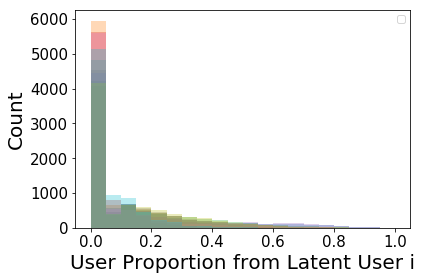

Latent User 0 Shape: (6714,)
Latent User 0 Top Features:
              Feature  LU0Pseudocount
54               salt     3468.235922
2   all-purpose flour     2954.761320
58              sugar     2557.318628
39         large eggs     1951.893481
60    unsalted butter     1616.421649
12             butter     1402.626547
7       baking powder     1387.471533
23               eggs     1233.231406
43               milk     1154.294469
64              water     1145.655213
Latent User 1 Shape: (6714,)
Latent User 1 Top Features:
                            Feature  LU1Pseudocount
7                           avocado      623.192929
23                    cooking spray      577.375814
67                      white onion      565.112727
11                       canola oil      510.703108
29                   fresh cilantro      492.192653
31                 fresh lime juice      440.435479
55                    plum tomatoes      383.100040
48                          oregano      361.185701


In [26]:
%%time
rlda.analyzeLDA(dataBinaryIngredients,10,1)

### 1c. Run LDA on n_topics = 20

Since there are 20 cuisines, let's see how LDA with 20 topics performs. 

We see similar layout as before: 

0- dessert

1- Asian

2- Indian / Mexican

3- Indian / Mexican

4- ?  (pepper, onions, olive oil, fresh parsley)

5- Thai (brown sugar, water, coconut milk)

6- Dessert 2 (cooking spray, eggs, whipping cream, sugar, dill, butter, asparagus)

7- ? (pasta, roma tomatoes, sweetened condensed milk, purple onion)

8- dessert 3 (flour, sugar, milk, butter, eggs, vanilla)

9- ?  (heavy cream, tomatoes, ground coriander, spaghetti, paprika)

10- Greek (lemon juice, olive oil, apers, cherry tomatoes, kalamata olives)

11- Korean? (ground pork, chives, english cucumber, white pepper, tofu)

12- Southern_US (sour cream, salsa, chicken breasts, cornmeal, flour tortillas)

13- Italian (zucchini, grated parmesan cheese, fresh basil)





C:\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Log-likelihood: -629005.9383279117
Average LL per data point:  -79.07051393185564
BIC: 1258191.5077746387
Average BIC per data point:  158.16360877116765
Perplexity 1565.189548116429
Latent Users Shape:  (20, 6714)
User Proportion from Latent Users Shape: (7955, 20)


No handles with labels found to put in legend.


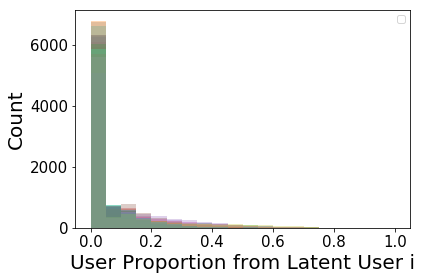

Latent User 0 Shape: (6714,)
Latent User 0 Top Features:
              Feature  LU0Pseudocount
36              lemon      959.777453
51               salt      690.464706
37          mayonaise      630.790386
62         warm water      450.865535
26          egg yolks      430.059567
15             cheese      357.582921
55              sugar      318.258331
1    active dry yeast      302.965089
3   all-purpose flour      289.726238
40             orange      282.450342
Latent User 1 Shape: (6714,)
Latent User 1 Top Features:
          Feature  LU1Pseudocount
64  vegetable oil     1221.804829
27   green onions      931.752590
53      scallions      865.034196
60      soy sauce      586.791029
55   sesame seeds      553.766868
12        carrots      423.042544
8     beansprouts      346.914090
19           eggs      330.614110
63          thyme      299.186470
23         garlic      268.713150
Latent User 2 Shape: (6714,)
Latent User 2 Top Features:
                   Feature  LU2Pseudo

In [28]:
%%time

rlda.analyzeLDA(dataBinaryIngredients,20,1)



### 2. Run on TF-IDF data

In [3]:
# Import TF-IDF pickle
tf_idf = pd.read_pickle('tf_idf.pkl')

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Log-likelihood: -317507.6522992981
Average LL per data point:  -39.91296697665595
BIC: 635194.9357174116
Average BIC per data point:  79.84851486076826
Perplexity 15320.496960912224
Latent Users Shape:  (20, 6714)
User Proportion from Latent Users Shape: (7955, 20)


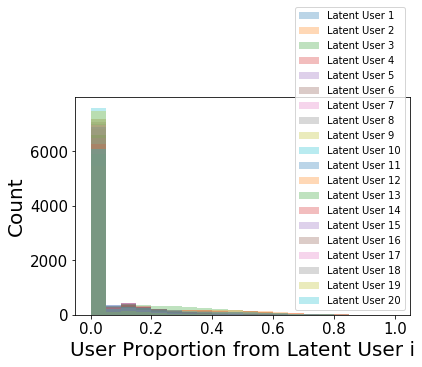

Latent User 0 Shape: (6714,)
Latent User 0 Top Features:
                   Feature  LU0Pseudocount
27       fresh lemon juice      268.551287
21  extra-virgin olive oil      242.940687
11                  capers      172.446567
23       flat leaf parsley      140.996830
33           garlic cloves      125.790672
50               olive oil      121.207570
56        red wine vinegar      114.888393
14         cherry tomatoes      109.699512
18      crushed red pepper      102.568046
47                linguine      100.796144
Latent User 1 Shape: (6714,)
Latent User 1 Top Features:
                     Feature  LU1Pseudocount
38         mozzarella cheese      186.540045
63  sweetened condensed milk      172.736933
21        fresh basil leaves      121.830956
62               sweet onion      117.617844
18           evaporated milk      100.760434
47                  pinenuts       98.885295
28                       ice       95.891373
7                     cheese       92.917252
67      

In [7]:
%%time
rlda.analyzeLDA(tf_idf,20,1)

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Log-likelihood: -297816.5069222914
Average LL per data point:  -37.43765014736536
BIC: 595722.8294039905
Average BIC per data point:  74.8865907484589
Perplexity 8427.74106634643
Latent Users Shape:  (10, 6714)
User Proportion from Latent Users Shape: (7955, 10)


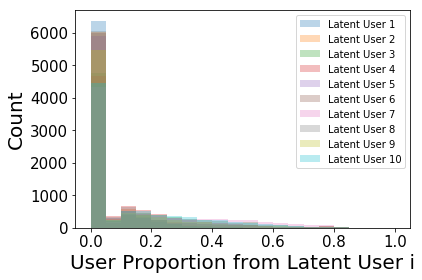

Latent User 0 Shape: (6714,)
Latent User 0 Top Features:
                       Feature  LU0Pseudocount
56  shredded mozzarella cheese      151.003904
48                       pasta      131.279574
35                   hot water      129.970131
42              marinara sauce      120.822301
61                     vinegar      112.545312
32             ground cardamom       94.794038
34        heavy whipping cream       91.787836
30                greek yogurt       90.706072
49                 penne pasta       86.662530
28               grated nutmeg       86.604741
Latent User 1 Shape: (6714,)
Latent User 1 Top Features:
                Feature  LU1Pseudocount
59          sweet onion      117.667667
14       chopped garlic      112.299096
50    self rising flour      107.239501
40                 pork       99.963395
18       cooked chicken       94.810577
30            ice cubes       88.749413
51  semisweet chocolate       88.359894
45                 rice       85.563759
7        

In [8]:
%%time
rlda.analyzeLDA(tf_idf,10,1)

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Log-likelihood: -255684.05631962646
Average LL per data point:  -32.1413018629323
BIC: 511377.09419519367
Average BIC per data point:  64.28373277123742
Perplexity 2346.044347982389
Latent Users Shape:  (1, 6714)
User Proportion from Latent Users Shape: (7955, 1)


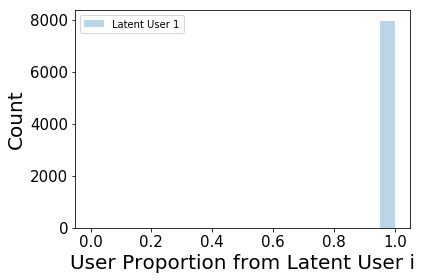

Latent User 0 Shape: (6714,)
Latent User 0 Top Features:
              Feature  LU0Pseudocount
55               salt     1100.517922
61              sugar     1022.711048
66              water      987.164962
47          olive oil      975.766195
5              butter      867.530516
26             garlic      861.441105
48             onions      860.593180
27      garlic cloves      811.645793
0   all-purpose flour      785.525096
65      vegetable oil      722.960216


/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Log-likelihood: -260472.13447736087
Average LL per data point:  -32.7431972944514
BIC: 520962.23206660326
Average BIC per data point:  65.48865267964842
Perplexity 2713.0072814886657
Latent Users Shape:  (2, 6714)
User Proportion from Latent Users Shape: (7955, 2)


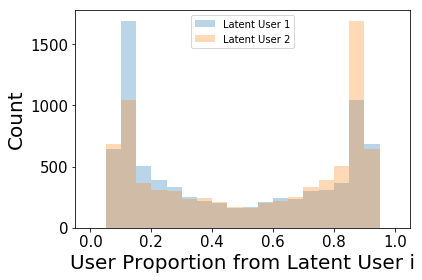

Latent User 0 Shape: (6714,)
Latent User 0 Top Features:
              Feature  LU0Pseudocount
57              sugar     1021.572806
64              water      619.176519
56          soy sauce      604.355028
1   all-purpose flour      561.281871
52               salt      475.348652
21               eggs      445.922515
2       baking powder      427.504364
62      vegetable oil      421.067347
38         large eggs      418.228581
60    unsalted butter      411.756073
Latent User 1 Shape: (6714,)
Latent User 1 Top Features:
                   Feature  LU1Pseudocount
45               olive oil      974.688626
46                  onions      686.125865
31           garlic cloves      679.309738
37     ground black pepper      676.579628
49                  pepper      652.283012
23  extra-virgin olive oil      630.973619
55                    salt      625.169270
30                  garlic      569.397076
61                tomatoes      533.282178
33  grated parmesan cheese      474.31

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Log-likelihood: -267348.1293900533
Average LL per data point:  -33.60755869139576
BIC: 534723.2034479289
Average BIC per data point:  67.21850451890998
Perplexity 3342.626691219065
Latent Users Shape:  (3, 6714)
User Proportion from Latent Users Shape: (7955, 3)


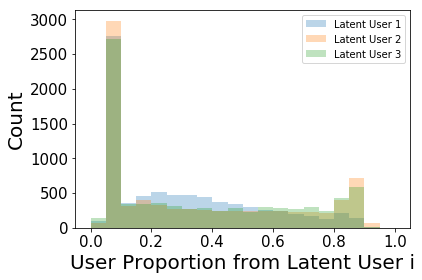

Latent User 0 Shape: (6714,)
Latent User 0 Top Features:
                   Feature  LU0Pseudocount
35            ground cumin      446.684948
44                  onions      437.840280
17  chopped cilantro fresh      390.285193
36        jalapeno chilies      381.729840
15            chili powder      367.708092
29                  garlic      364.848744
27        fresh lime juice      321.903064
63           vegetable oil      321.044080
0                  avocado      315.667176
54                    salt      308.577531
Latent User 1 Shape: (6714,)
Latent User 1 Top Features:
              Feature  LU1Pseudocount
57              sugar      911.926054
1   all-purpose flour      540.918559
54          soy sauce      518.335054
64              water      478.515525
18               eggs      428.617750
2       baking powder      427.406348
33         large eggs      415.792123
5              butter      399.606799
59    unsalted butter      396.673805
61    vanilla extract      384.20

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Log-likelihood: -269424.9937044056
Average LL per data point:  -33.868635286537476
BIC: 538885.9136325743
Average BIC per data point:  67.74178675456622
Perplexity 3560.117753819171
Latent Users Shape:  (4, 6714)
User Proportion from Latent Users Shape: (7955, 4)


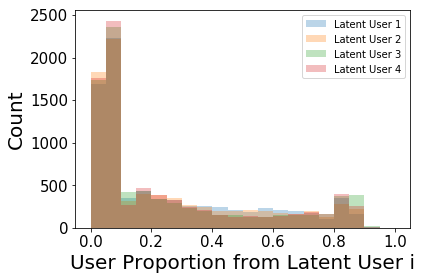

Latent User 0 Shape: (6714,)
Latent User 0 Top Features:
                   Feature  LU0Pseudocount
46               olive oil      666.226653
19  extra-virgin olive oil      609.444947
33           garlic cloves      435.726101
27       fresh lemon juice      428.935011
35     ground black pepper      407.837310
34  grated parmesan cheese      406.757573
17          dry white wine      304.327060
29           fresh parsley      297.988410
25             fresh basil      290.327654
58                    salt      289.037422
Latent User 1 Shape: (6714,)
Latent User 1 Top Features:
                   Feature  LU1Pseudocount
58              sour cream      377.531593
47                  onions      358.522158
34            ground cumin      334.460017
38        jalapeno chilies      333.276685
13            chili powder      306.036657
15  chopped cilantro fresh      304.457890
0                  avocado      300.674981
29           garlic powder      300.279367
51                  pepper

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Log-likelihood: -276730.0624324607
Average LL per data point:  -34.786934309548805
BIC: 553505.0326446253
Average BIC per data point:  69.5795138459617
Perplexity 4443.827360091705
Latent Users Shape:  (5, 6714)
User Proportion from Latent Users Shape: (7955, 5)


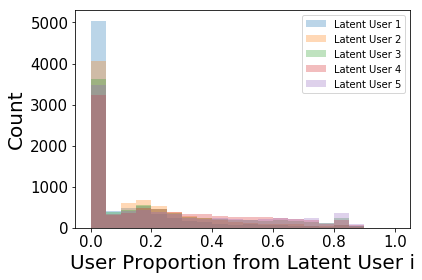

Latent User 0 Shape: (6714,)
Latent User 0 Top Features:
                     Feature  LU0Pseudocount
55                     sugar      291.572219
61           vanilla extract      256.705651
65               white sugar      211.412801
42           large egg yolks      202.369864
25                 egg yolks      200.788308
56  sweetened condensed milk      172.884427
18       confectioners sugar      153.274190
64            whipping cream      152.685795
36               heavy cream      149.264230
9                     butter      142.508985
Latent User 1 Shape: (6714,)
Latent User 1 Top Features:
              Feature  LU1Pseudocount
1   all-purpose flour      476.024848
4       baking powder      427.306669
57              sugar      363.320532
36         large eggs      356.629315
60    unsalted butter      317.040639
10             butter      305.940633
11         buttermilk      282.589056
5         baking soda      272.943843
42               milk      257.966350
20         

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Log-likelihood: -284847.10038759746
Average LL per data point:  -35.80730363137617
BIC: 569748.0901108396
Average BIC per data point:  71.62138153498927
Perplexity 5685.2960359394965
Latent Users Shape:  (6, 6714)
User Proportion from Latent Users Shape: (7955, 6)


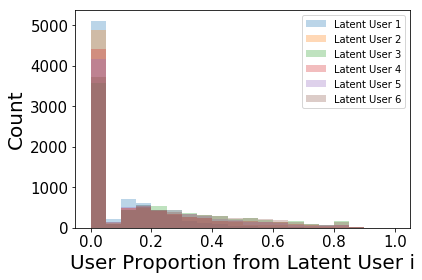

Latent User 0 Shape: (6714,)
Latent User 0 Top Features:
                     Feature  LU0Pseudocount
13       confectioners sugar      153.242324
56                 spaghetti      138.078732
29               half & half      136.678511
67               white onion      130.568689
59                tomatillos      127.934433
42               pasta sauce      127.541552
61  unsweetened cocoa powder      113.741646
51           russet potatoes      107.383767
57                     sugar      106.837428
9                     chiles      106.611809
Latent User 1 Shape: (6714,)
Latent User 1 Top Features:
                   Feature  LU1Pseudocount
25        fresh lime juice      352.302687
1                  avocado      315.697791
35              lime juice      288.078390
8   chopped cilantro fresh      285.286256
30        jalapeno chilies      283.503424
34                    lime      263.391008
24          fresh cilantro      213.734199
16          corn tortillas      202.653138
49  

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Log-likelihood: -286841.16090976115
Average LL per data point:  -36.05797120172988
BIC: 573745.1927111077
Average BIC per data point:  72.12384572106947
Perplexity 6040.01586724345
Latent Users Shape:  (7, 6714)
User Proportion from Latent Users Shape: (7955, 7)


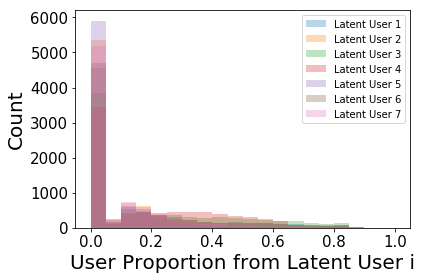

Latent User 0 Shape: (6714,)
Latent User 0 Top Features:
         Feature  LU0Pseudocount
58     soy sauce      571.562319
53    sesame oil      365.985651
52     scallions      286.466106
48  rice vinegar      285.066630
24  green onions      271.992915
61         sugar      249.420466
11   corn starch      246.813350
18        garlic      242.398611
65         water      235.848506
8        carrots      222.282275
Latent User 1 Shape: (6714,)
Latent User 1 Top Features:
                 Feature  LU1Pseudocount
40             mayonaise      159.319728
38     light brown sugar      157.472213
34     italian seasoning      150.829821
66  worcestershire sauce      149.210714
18              cucumber      122.550674
57           sweet onion      117.708551
62               vinegar      112.585932
12        chopped garlic      112.338695
59                 thyme      107.352149
16          corn kernels      105.043497
Latent User 2 Shape: (6714,)
Latent User 2 Top Features:
               

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Log-likelihood: -290566.2003705064
Average LL per data point:  -36.52623511885687
BIC: 581204.253188539
Average BIC per data point:  73.06150260069629
Perplexity 6763.0130233398695
Latent Users Shape:  (8, 6714)
User Proportion from Latent Users Shape: (7955, 8)


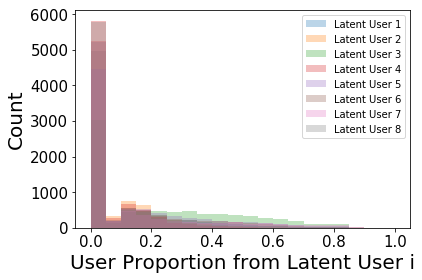

Latent User 0 Shape: (6714,)
Latent User 0 Top Features:
                       Feature  LU0Pseudocount
29      grated parmesan cheese      309.777301
43           mozzarella cheese      186.614445
58  shredded mozzarella cheese      186.162228
44                   olive oil      170.757096
36           italian seasoning      150.814623
51                      pepper      145.030679
12               cooking spray      143.870514
61                tomato sauce      135.804073
54              ricotta cheese      135.241771
14                 dried basil      133.776954
Latent User 1 Shape: (6714,)
Latent User 1 Top Features:
             Feature  LU1Pseudocount
13          cucumber      227.497979
62        warm water      212.237052
1   active dry yeast      157.297502
28      onion powder      139.275308
58    taco seasoning      118.381119
57       sweet onion      117.691771
8          chickpeas      114.810899
6     cheddar cheese      108.042201
39     refried beans      101.605512

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Log-likelihood: -293312.40777528606
Average LL per data point:  -36.871452894441994
BIC: 586705.6495540391
Average BIC per data point:  73.75306719723936
Perplexity 7350.887093260465
Latent Users Shape:  (9, 6714)
User Proportion from Latent Users Shape: (7955, 9)


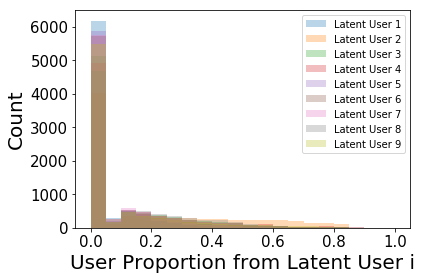

Latent User 0 Shape: (6714,)
Latent User 0 Top Features:
             Feature  LU0Pseudocount
10        buttermilk      282.506161
14            cheese      179.667678
34  large egg whites      162.624716
5        baking soda      157.769052
67  yellow corn meal      133.410641
17    chopped garlic      112.309840
47        red pepper      106.258345
56        shortening      104.402530
25   evaporated milk      100.821288
60             sugar       99.156612
Latent User 1 Shape: (6714,)
Latent User 1 Top Features:
          Feature  LU1Pseudocount
56      soy sauce      585.676767
21         garlic      398.883754
52     sesame oil      365.954321
51      scallions      357.001219
63          water      343.492044
24   green onions      316.832799
61  vegetable oil      306.827887
58          sugar      300.699252
47   rice vinegar      296.770129
17     fish sauce      282.771982
Latent User 2 Shape: (6714,)
Latent User 2 Top Features:
                       Feature  LU2Pseudocount
1

In [9]:
for n_topics in range(1,10):
    rlda.analyzeLDA(tf_idf,n_topics,1)